# Phase Unwrapping with Kamui

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import unwrap_phase
from time import time

from kamui import unwrap_dimensional

CMAP = 'gray'

## Plane Wave

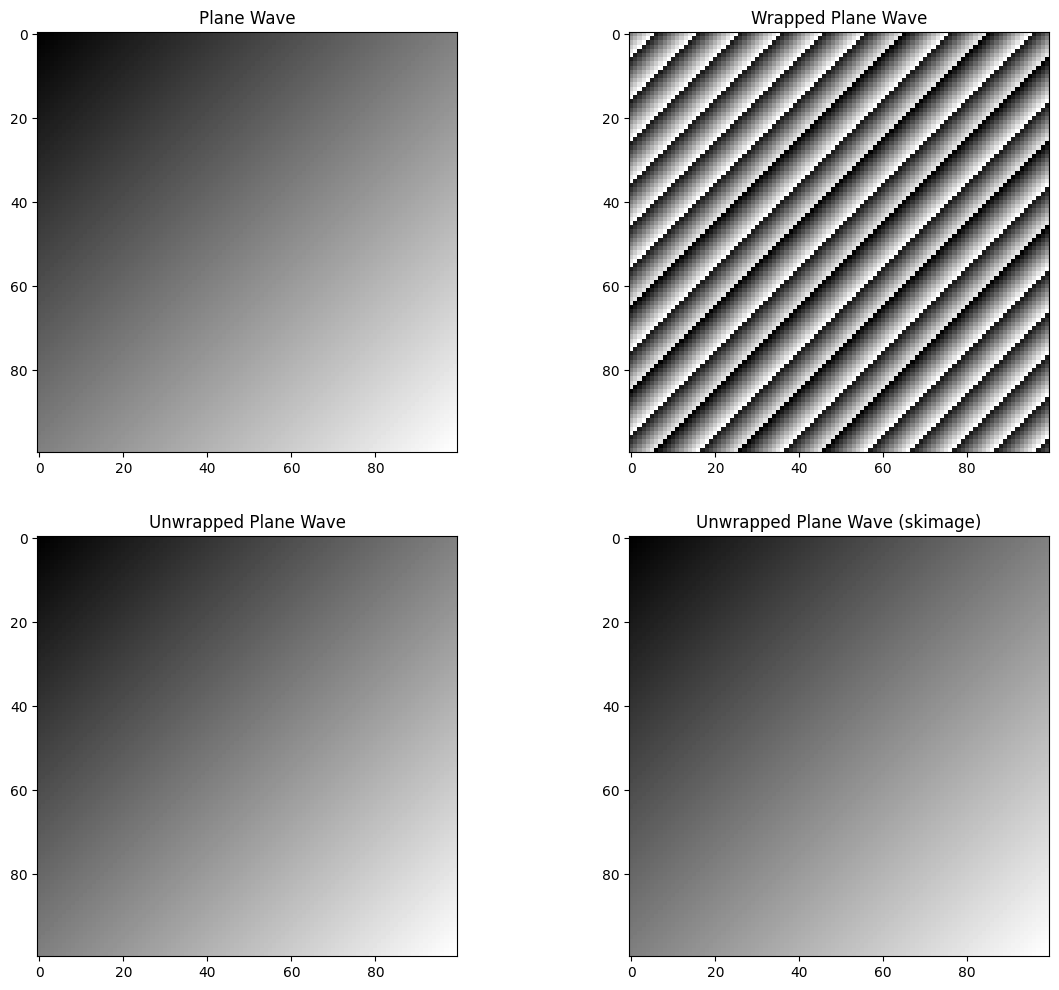

In [14]:
N = 100
xx,yy = np.meshgrid(np.arange(N), np.arange(N), indexing='ij')
plane_wave = (yy + xx) * 0.2 * np.pi
wrapped_plane_wave = np.angle(np.exp(1j * plane_wave))
#plane_wave = np.angle(np.exp(1j*(yy+xx)/(4*np.sqrt(2))))
result = unwrap_dimensional(wrapped_plane_wave)

fig = plt.figure(figsize=(14, 12))
plt.subplot(221)
plt.title('Plane Wave')
plt.imshow(plane_wave, cmap=CMAP)
plt.subplot(222)
plt.title('Wrapped Plane Wave')
plt.imshow(wrapped_plane_wave, cmap=CMAP)
plt.subplot(223)
plt.title('Unwrapped Plane Wave')
plt.imshow(result, cmap=CMAP)
plt.subplot(224)
plt.title('Unwrapped Plane Wave (skimage)')
plt.imshow(unwrap_phase(wrapped_plane_wave), cmap=CMAP)
plt.show()

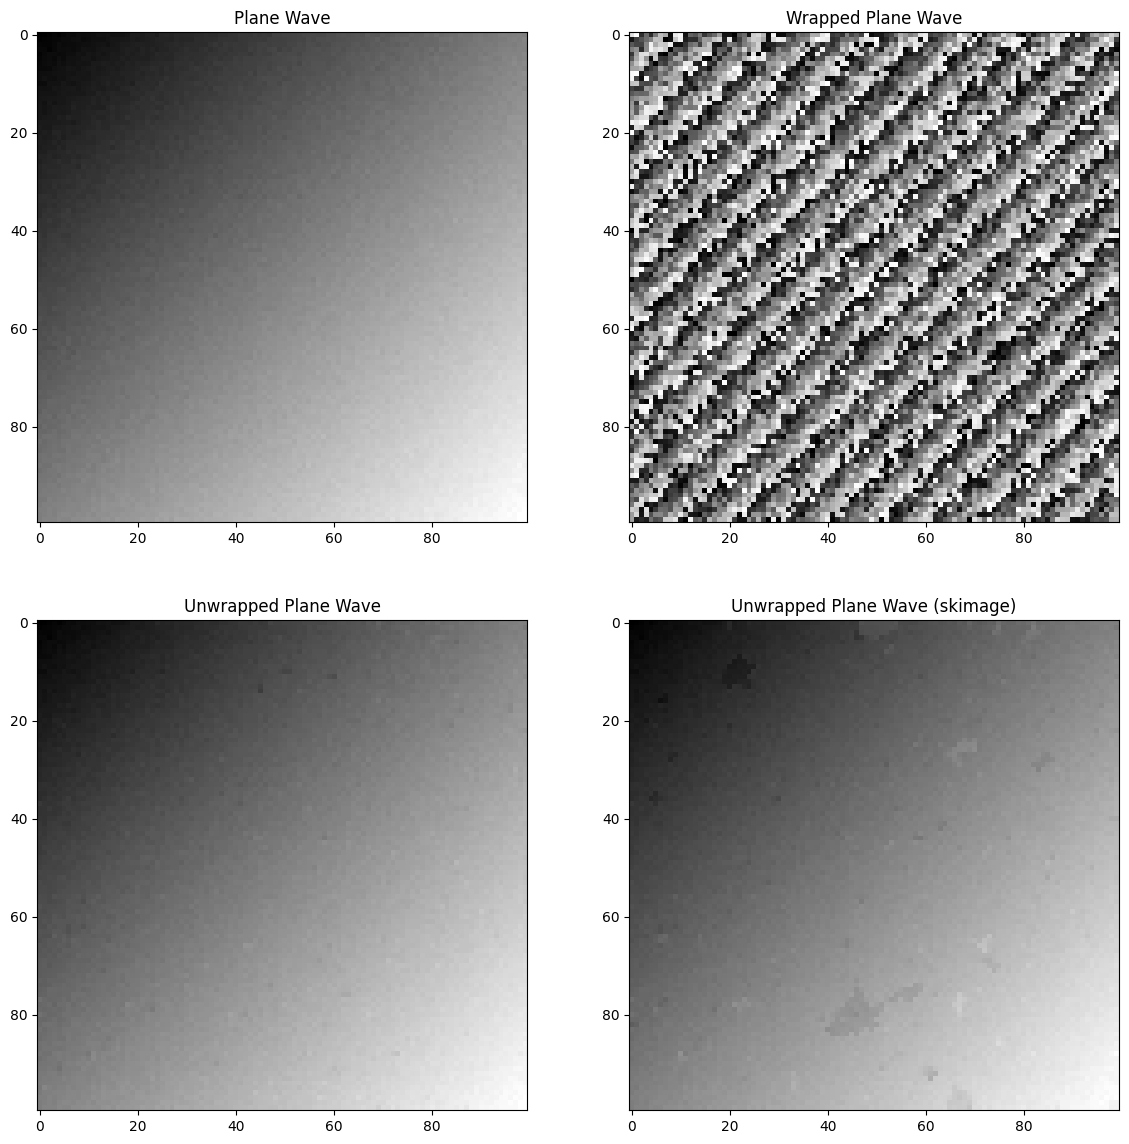

In [15]:
noise_plane_wave = plane_wave + np.random.randn(*plane_wave.shape) * 0.15 * 2 * np.pi
wrapped_noise_plane_wave = (noise_plane_wave) % (2 * np.pi)
fig = plt.figure(figsize=(14, 14))
plt.subplot(221)
plt.title('Plane Wave')
plt.imshow(noise_plane_wave, cmap=CMAP)
plt.subplot(222)
plt.title('Wrapped Plane Wave')
plt.imshow(wrapped_noise_plane_wave, cmap=CMAP)
plt.subplot(223)
plt.title('Unwrapped Plane Wave')
plt.imshow(unwrap_dimensional(wrapped_noise_plane_wave), cmap=CMAP)
plt.subplot(224)
plt.title('Unwrapped Plane Wave (skimage)')
plt.imshow(unwrap_phase(wrapped_noise_plane_wave), cmap=CMAP)
plt.show()

## Shear

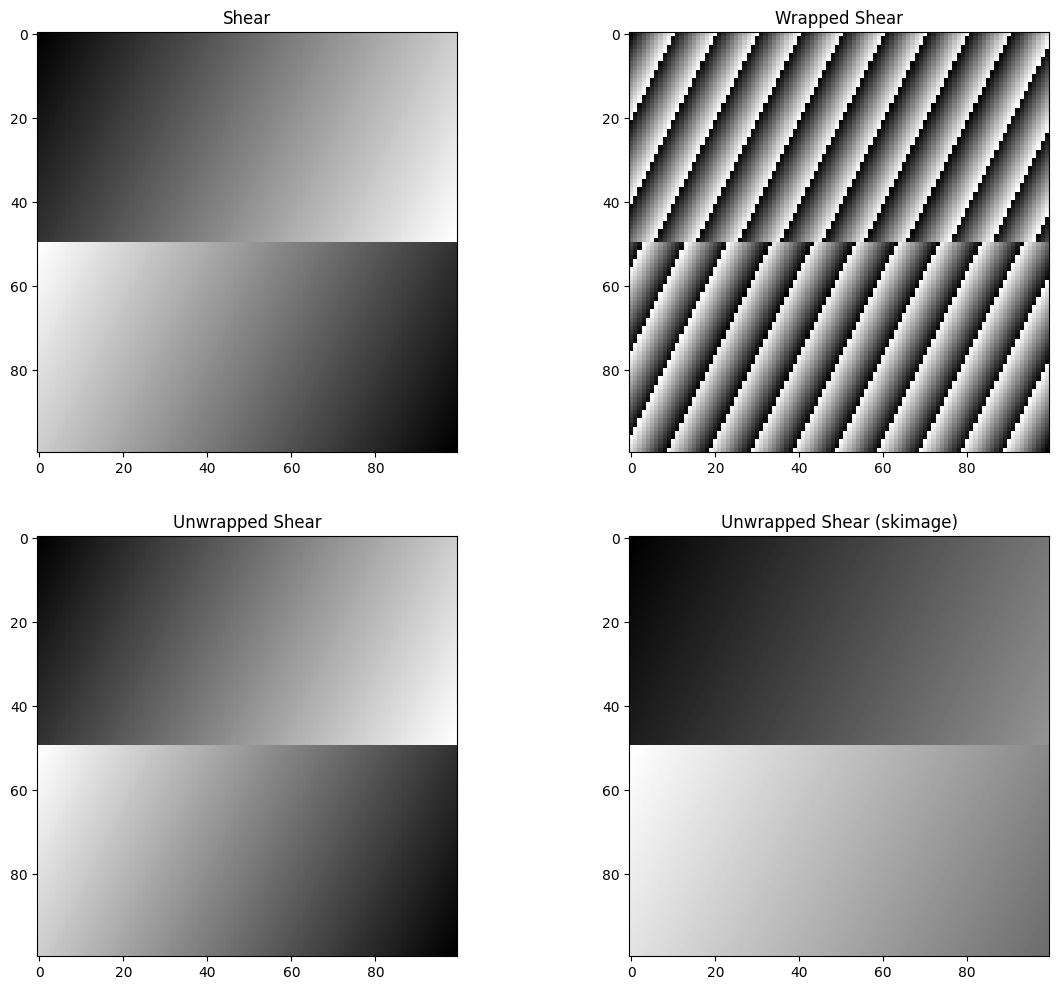

In [16]:
xx2,yy2 = np.meshgrid(np.arange(50), np.arange(100), indexing='ij')
shear = np.concatenate([(yy2/1.6 + xx2/3.2),
                        (yy2/1.6 + xx2/3.2)[::-1, ::-1]])
# wrapped_shear = wrap_func(shear)
wrapped_shear = shear % (2 * np.pi)

fig = plt.figure(figsize=(14, 12))
plt.subplot(221)
plt.title('Shear')
plt.imshow(shear, cmap=CMAP)
plt.subplot(222)
plt.title('Wrapped Shear')
plt.imshow(wrapped_shear, cmap=CMAP)
plt.subplot(223)
plt.title('Unwrapped Shear')
plt.imshow(unwrap_dimensional(wrapped_shear), cmap=CMAP)
plt.subplot(224)
plt.title('Unwrapped Shear (skimage)')
plt.imshow(unwrap_phase(wrapped_shear), cmap=CMAP)
plt.show()

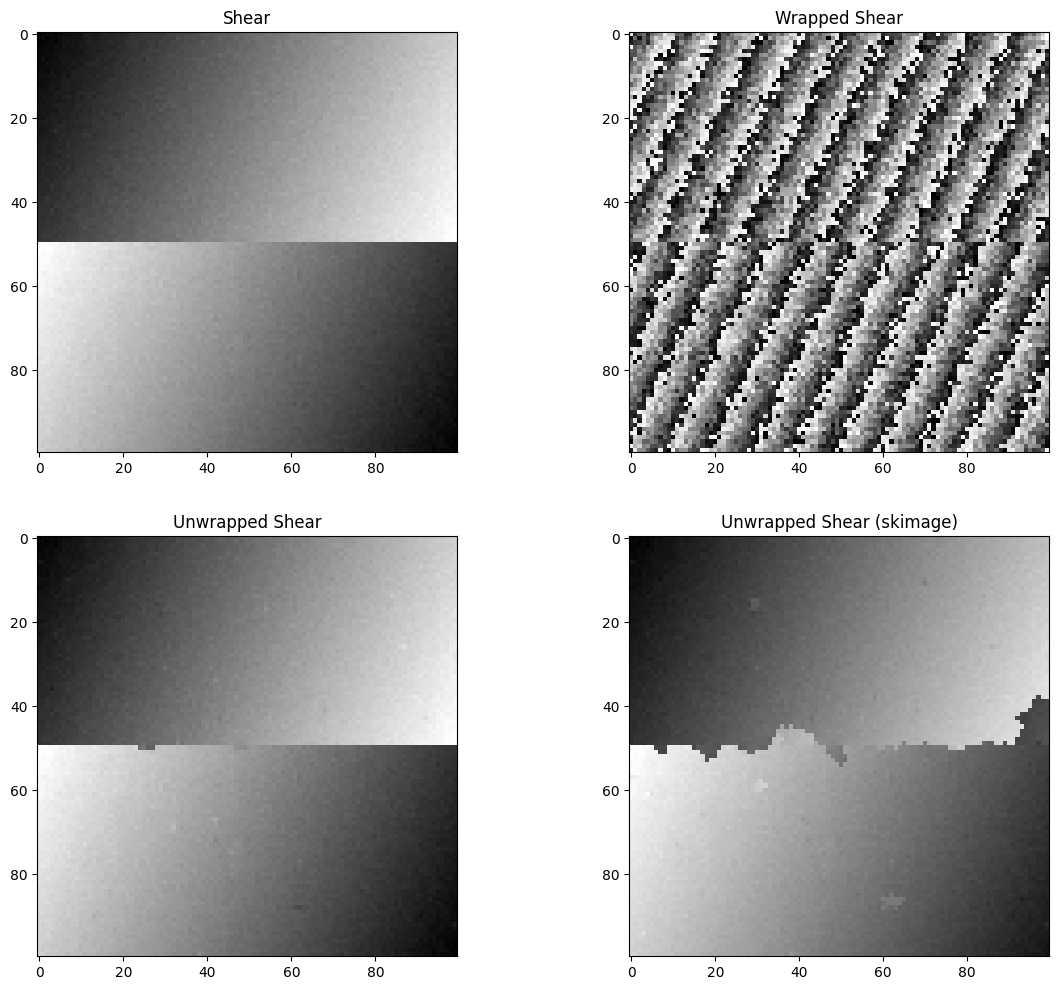

In [17]:
noise_shear = shear + np.random.randn(*shear.shape) * 0.125 * 2 * np.pi
wrapped_noise_shear = (noise_shear) % (2 * np.pi)
fig = plt.figure(figsize=(14, 12))
plt.subplot(221)
plt.title('Shear')
plt.imshow(noise_shear, cmap=CMAP)
plt.subplot(222)
plt.title('Wrapped Shear')
plt.imshow(wrapped_noise_shear, cmap=CMAP)
plt.subplot(223)
plt.title('Unwrapped Shear')
plt.imshow(unwrap_dimensional(wrapped_noise_shear), cmap=CMAP)
plt.subplot(224)
plt.title('Unwrapped Shear (skimage)')
plt.imshow(unwrap_phase(wrapped_noise_shear), cmap=CMAP)
plt.show()

## Gaussian

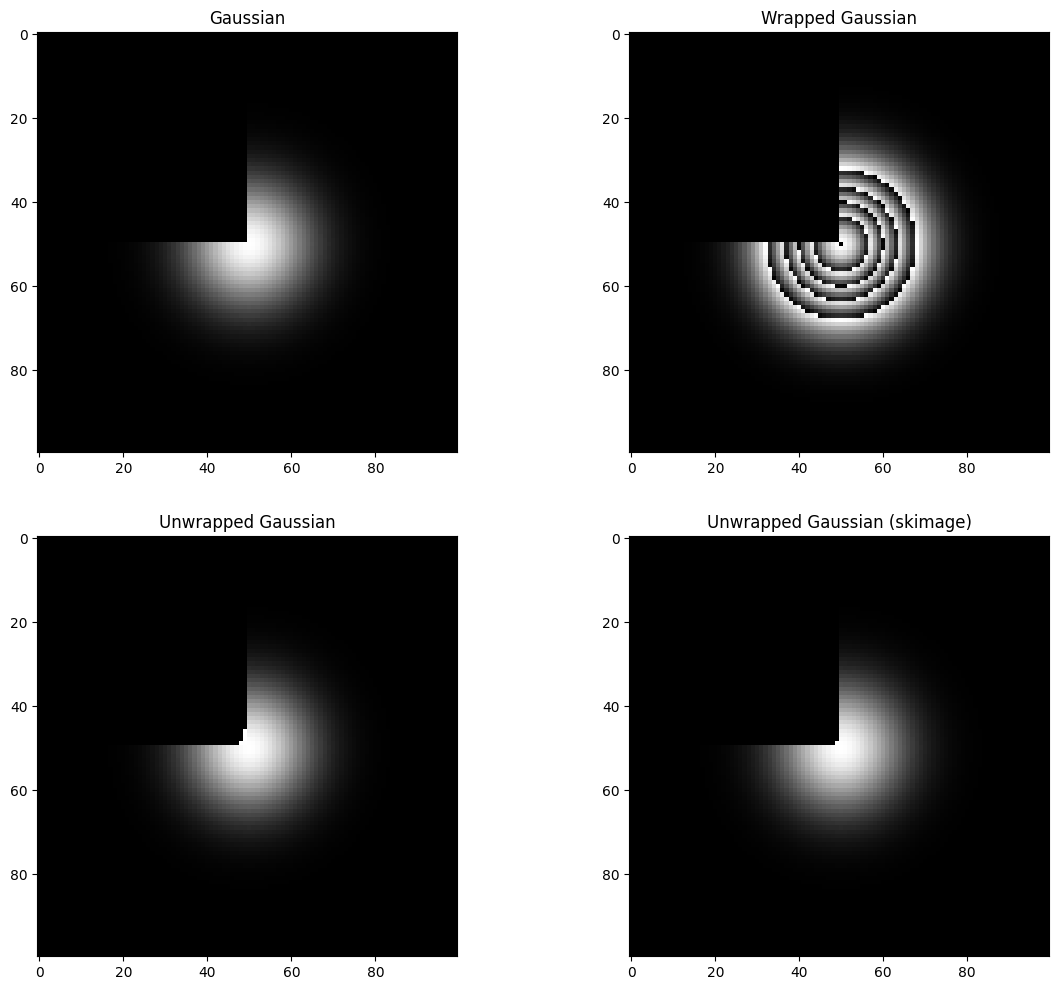

In [18]:
std = N / 10
height = 10 * np.pi
gauss = np.exp(-0.5 * ((xx - N * 0.5) ** 2 + (yy - N * 0.5) ** 2) / std ** 2) * height
gauss[:N//2, :N//2] = 0
wrapped_gauss = gauss % (2 * np.pi)

fig = plt.figure(figsize=(14, 12))
plt.subplot(221)
plt.title('Gaussian')
plt.imshow(gauss, cmap=CMAP)
plt.subplot(222)
plt.title('Wrapped Gaussian')
plt.imshow(wrapped_gauss, cmap=CMAP)
plt.subplot(223)
plt.title('Unwrapped Gaussian')
plt.imshow(unwrap_dimensional(wrapped_gauss), cmap=CMAP)
plt.subplot(224)
plt.title('Unwrapped Gaussian (skimage)')
plt.imshow(unwrap_phase(wrapped_gauss), cmap=CMAP)
plt.show()

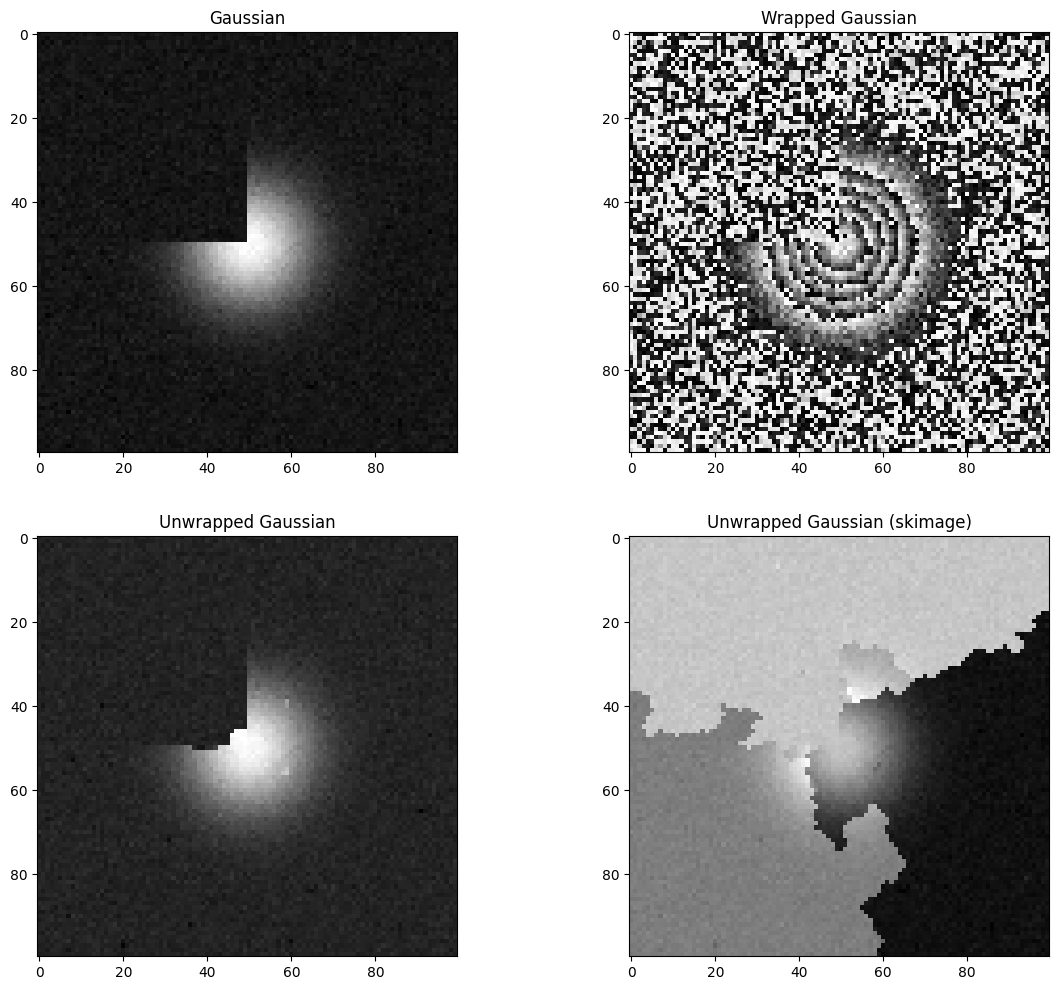

In [19]:
noise_gauss = gauss + np.random.randn(*shear.shape) * 0.12 * 2 * np.pi
wrapped_noise_gauss = (noise_gauss) % (2 * np.pi)
fig = plt.figure(figsize=(14, 12))
plt.subplot(221)
plt.title('Gaussian')
plt.imshow(noise_gauss, cmap=CMAP)
plt.subplot(222)
plt.title('Wrapped Gaussian')
plt.imshow(wrapped_noise_gauss, cmap=CMAP)
plt.subplot(223)
plt.title('Unwrapped Gaussian')
plt.imshow(unwrap_dimensional(wrapped_noise_gauss), cmap=CMAP)
plt.subplot(224)
plt.title('Unwrapped Gaussian (skimage)')
plt.imshow(unwrap_phase(wrapped_noise_gauss), cmap=CMAP)
plt.show()

## Chelsea Cat

skimage unwrap took 0.055 seconds
Kamui unwrap took 11.326 seconds


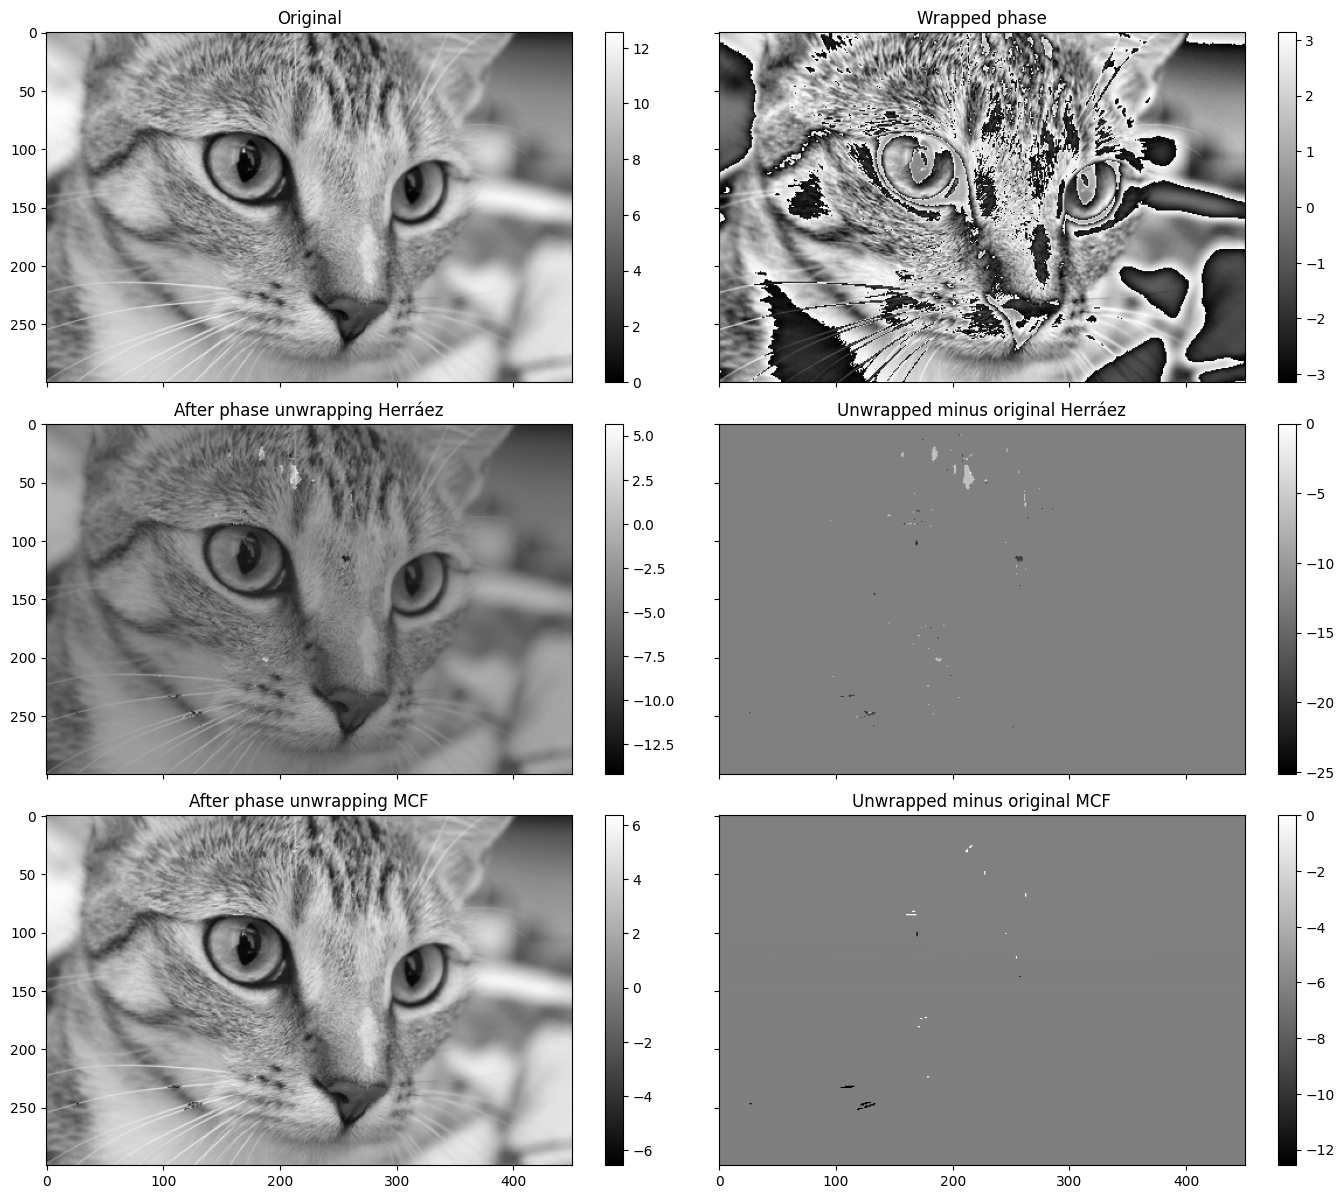

In [20]:
from skimage import data, img_as_float, color, exposure


# Load an image as a floating-point grayscale
image = color.rgb2gray(img_as_float(data.chelsea()))
# Scale the image to [0, 4*pi]
image = exposure.rescale_intensity(image, out_range=(0, 4 * np.pi))
# Create a phase-wrapped image in the interval [-pi, pi)
image_wrapped = np.angle(np.exp(1j * image))
# Perform phase unwrapping
start = time()
image_unwrapped = unwrap_phase(image_wrapped)
print('skimage unwrap took {:.3f} seconds'.format(time() - start))
# Perform phase unwrapping using Kamui
start = time()
image_unwrapped2 = unwrap_dimensional(image_wrapped)
print('Kamui unwrap took {:.3f} seconds'.format(time() - start))

fig, ax = plt.subplots(3, 2, sharex=True, sharey=True, figsize=[14,12])
ax = ax.ravel()

fig.colorbar(ax[0].imshow(image, cmap=CMAP, vmin=0, vmax=4 * np.pi), ax=ax[0])
ax[0].set_title('Original')

fig.colorbar(ax[1].imshow(image_wrapped, cmap=CMAP, vmin=-np.pi, vmax=np.pi),
             ax=ax[1])
ax[1].set_title('Wrapped phase')

fig.colorbar(ax[2].imshow(image_unwrapped, cmap=CMAP), ax=ax[2])
ax[2].set_title('After phase unwrapping Herráez')

fig.colorbar(ax[3].imshow(image_unwrapped - image, cmap=CMAP), ax=ax[3])
ax[3].set_title('Unwrapped minus original Herráez')

fig.colorbar(ax[4].imshow(image_unwrapped2, cmap=CMAP), ax=ax[4])
ax[4].set_title('After phase unwrapping MCF')

fig.colorbar(ax[5].imshow(image_unwrapped2 - image, cmap=CMAP), ax=ax[5])
ax[5].set_title('Unwrapped minus original MCF')
plt.tight_layout()